<img style="float: left;" src="images/unige_csd.png" alt="drawing" width="200"/>

# <center>Imagerie Numérique 2023 Automne</center>

<center>November 10, 2023</center>

# <center><ins>TP Class N°4 - Histograms and point operations</ins></center>

#### *Instructions :*  

* This TP should be completed and uploaded on Moodle before **Thursday 23 November 2023, 23h59**.
* The name of the file you upload should be **TP4_name_surname.ipynb**.
* If you need to include attached files to you TP, please archive them together in a folder named **TP4_name_surname.zip**.

## Exercise 1. Exposure analysis

You are given 3 images: _img\_1.png_, _img\_2.png_ and _img\_3.png_.

(a) Plot the histograms of these images using the _histogram(.)_ function from the _skimage_ package.

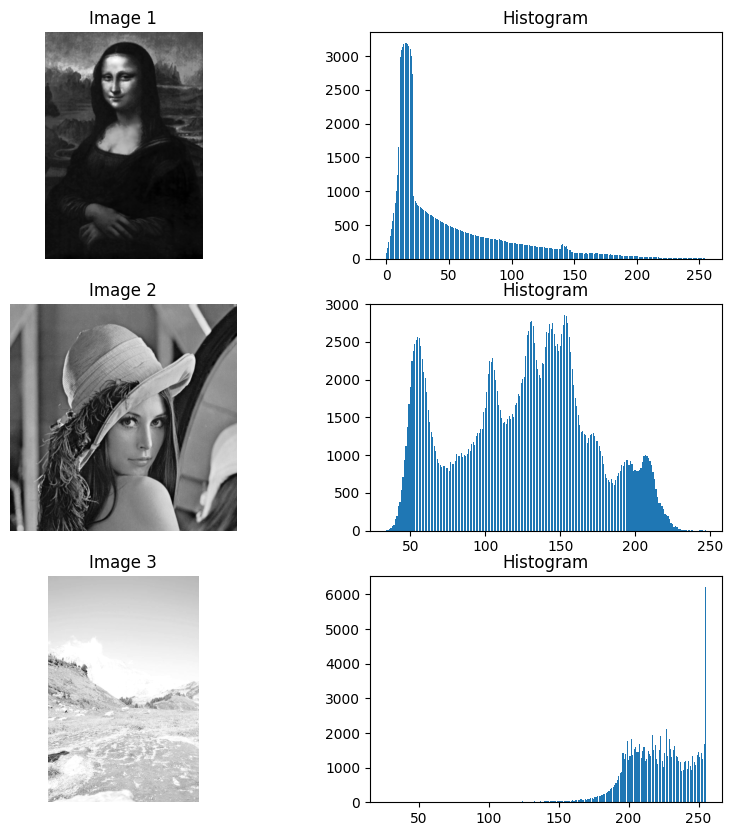

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk

# Take a list of image and print each image with it histogram
def print_imgs_hist(images: list[np.ndarray], cmap='viridis'):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(len(images), 2, i*2 + 1)
        plt.imshow(images[i], cmap=cmap)
        plt.axis('off')
        plt.title(f"Image {i + 1}")
        plt.subplot(len(images), 2, 2*i + 2)
        hist = sk.exposure.histogram(sk.img_as_ubyte(images[i]))
        plt.bar(hist[1], hist[0])
        plt.title("Histogram")
    plt.show()

# Print an image
def print_image(image: np.ndarray, title="Image", cmap='viridis'):
    plt.figure()
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Print all the components of an RGB image
def print_image_rgb_component(image: np.ndarray, title="Image") -> bool:
    if len(image.shape) == 3 and image.shape[2] == 3:
        RGB = ["_R", "_G", "_B"]
        plt.figure(figsize=(10, 10))
        for i in range(3):
            plt.subplot(1, 3, i + 1)
            plt.imshow(image[:,:,i], cmap='gray')
            plt.axis('off')
            plt.title(title + RGB[i])
        plt.show()
        return True
    return False

# Create list of images
images = []
for i in range(1, 4):
    images.append(plt.imread('./images/img_' + str(i) + '.png'))

# Print images and histograms
print_imgs_hist(images, 'gray')


(b) Try to detect if these images have problems with exposure. If yes, identify the reasons of these problems via histogram analysis.

> Answer here

- The first image has a problem of under exposure because it looks very dark... In fact, when we see the histogram, it's normal because we have a great density of pixels with value near 25. So we have a great density of darken pixels, that's why the image look very dark.

-  The second image looks very good and we can see that the number of pixels is relatively equally distributed in range 40 and 230... We could make a stretching to have more contrast in this image, but this image has no problem of exposure

- I think that this image is over exposed, and when we look at the histogram, we can see that we have a big number of white pixels, and a smal number of dark pixels... That's why the image looks very bright.

(c) Suggest an automatic procedure for detection of under/over-exposure in images.

> Answer here

I think that there is no way to detect under and over exposure in images. In fact, we can only determinate the percentage of very dark  and very white pixels, but we can't determine if the image is over expose or under expose because we can have for instance an image with a lot of white pixel, and the image is not over expose because it's a snow image. I think that the evaluation of under or over exposition of an image depends on the representation of the image and how the representation should be, and not on the percentage of white and dark pixels. Perhaps we could train an AI to detect under and over exposition, but I don't see another way. 

## Exercise 2. Contrast analysis

You are given 3 images: _img\_4.png_, _img\_5.png_ and _img\_6.png_.

Detect and identify contrast problems in these images, if any. Justify your answer based on the analysis of the histograms.

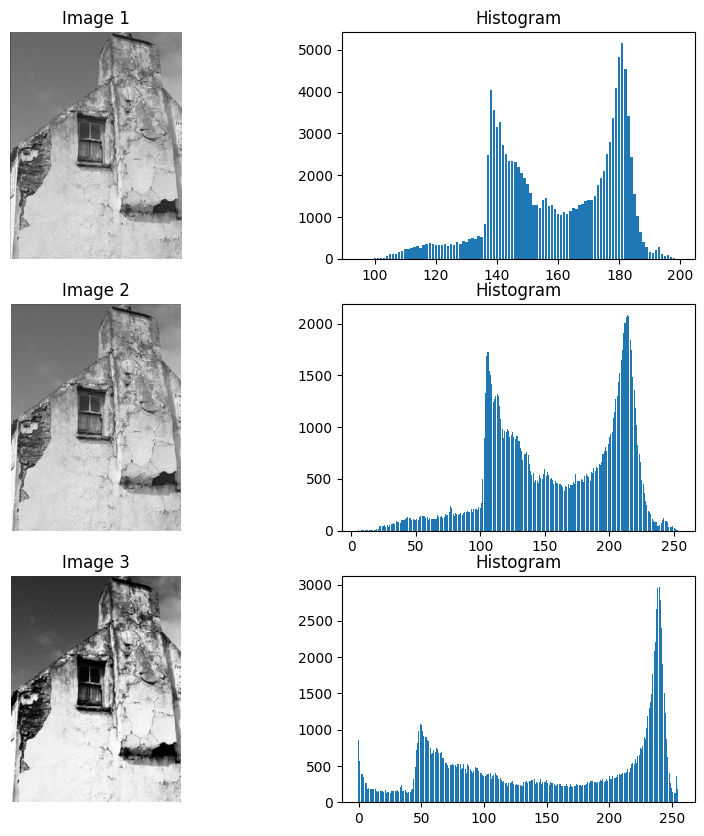

In [2]:
images = []
for i in range(4, 7):
    images.append(plt.imread('./images/img_' + str(i) + '.png'))

print_imgs_hist(images, 'gray')


- Personally, I find that there is no big difference between the image 1 and the image 2... But if we visualize this images in a viewer, with a higher size, we can see that the image 1 is too bright compared to the image 2: in a viewer, I find that the image 1 is over exposed. And when we look at the histograms, we can see that the histogram of the first image is distributed in range 100, 200. So we dont have many dark pixels, that's why we could increase the contrast by stretching the image into range 0, 255.

- Personnaly, I find that the exposure of the second image is good. And when we look at the histogram, we see that it's well distributed in range 0, 255.

- The third image is more contrasted, or too contrasted because it looks very bad, that's why I think that it is under exposed... In fact, when we see the histogram, we can observe that the pixels are distributed between 0 and 255. But visualy, we find that the image is under exposed, that's why we can't make algorithm to detect over exposure and under exposure because it depends on our vision. 

## Exercise 3. Contrast adjustment

**Important!** For color images, the histogram analysis should be performed individually on each color channel.

(a) Write a function that performs an image contrast adjustment (stretching). For more details see Theme 4.

In [3]:
def stretching(image: np.ndarray, begin: int, end: int) -> np.ndarray:
    newimage = sk.img_as_float32(image.copy())
    if len(newimage.shape) == 3 and newimage.shape[2] != 1:
        for i in range(newimage.shape[2]):
            newimage[:,:,i] =  np.clip((1./(end/255- begin/255))*(newimage[:,:,i] - begin/255), 0, 1)
    else:
        newimage = np.clip((1./(np.max(newimage) - np.min(newimage)))*(newimage - np.min(newimage)), 0, 1)
    return newimage


(b) Apply your contrast adjustment function to the image _img 9.png_. Show image histogram before and after adjustment. Explain the result.

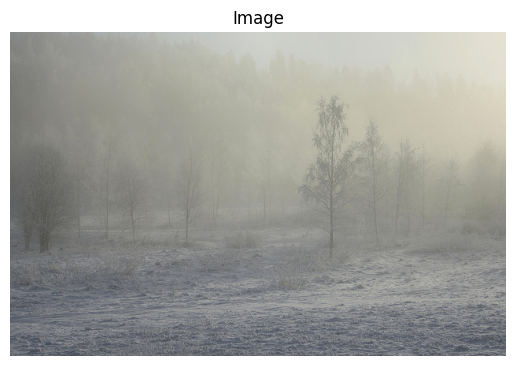

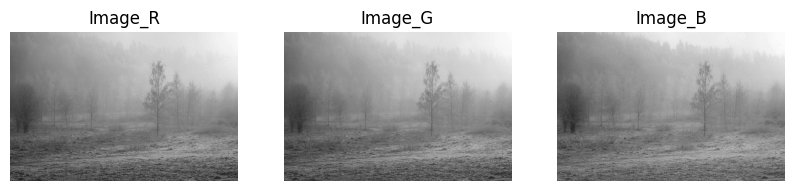

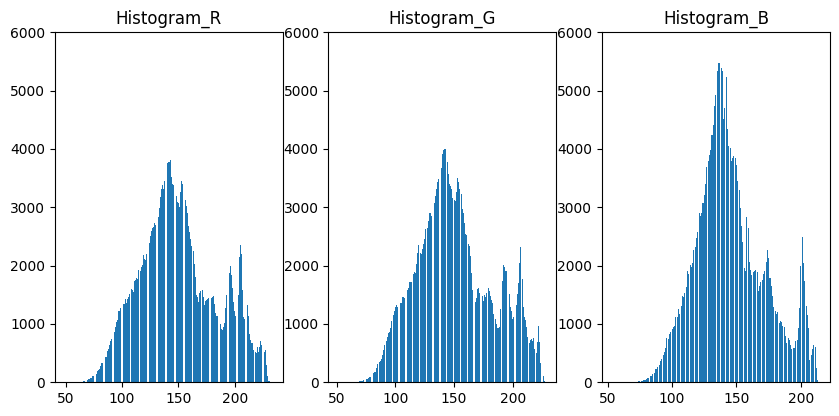

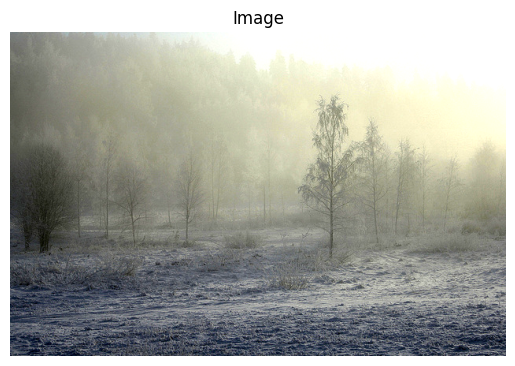

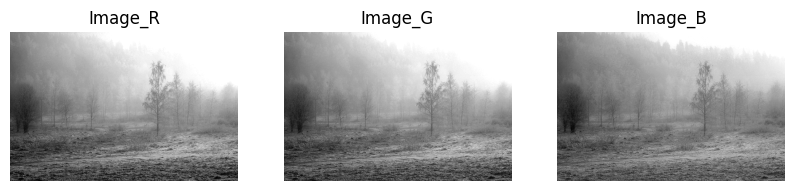

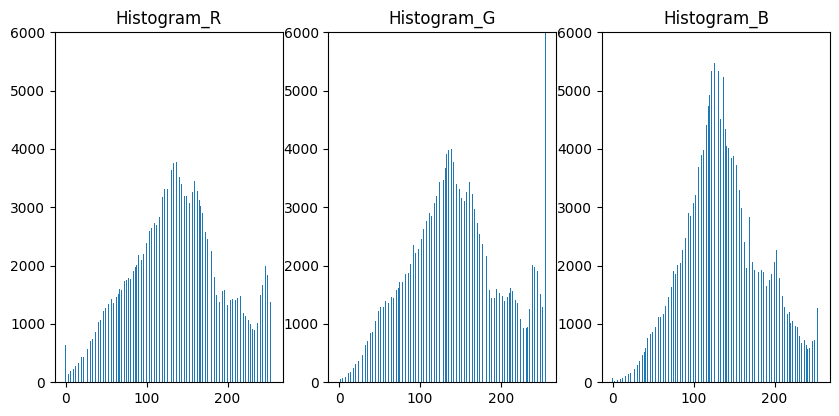

In [4]:
def print_img_hist(image: np.ndarray, lim=6000):
    if len(image.shape) == 3:
        print_image(image)
        if print_image_rgb_component(image):
            RGB = ["_R", "_G", "_B"]
            plt.figure(figsize=(10, 10))
            for i in range(image.shape[2]):
                plt.subplot(2, image.shape[2], i + image.shape[2] + 1)
                hist = sk.exposure.histogram(sk.img_as_ubyte(image[:,:,i]))
                plt.bar(hist[1], hist[0])
                plt.ylim(0, lim)
                plt.title("Histogram" + RGB[i])
            plt.show()
    else:
        plt.figure(figsize=(10, 10))
        plt.subplot(121)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title("Image")
        plt.subplot(122)
        hist = sk.exposure.histogram(sk.img_as_ubyte(image))
        plt.bar(hist[1], hist[0])
        plt.title("Histogram")
        plt.show()

img_9 = plt.imread('./images/img_9.png')

print_img_hist(img_9)

img_9_stretched = stretching(img_9, 75, 200)

print_img_hist(img_9_stretched)

We can see more details in image stretched. It's because we add contrast by stretching values of the images... Now the pixels are distributed in range 0, 255. But we can see that all the values which were over 200, the value choosen, are now at 255, so we have an image more brighter than the original image...

(c) Apply the _rescale intensity(.)_ function from the _skimage_ package to the original image. Compare the result with the results of your function. Explain the differences in image quality, if any.

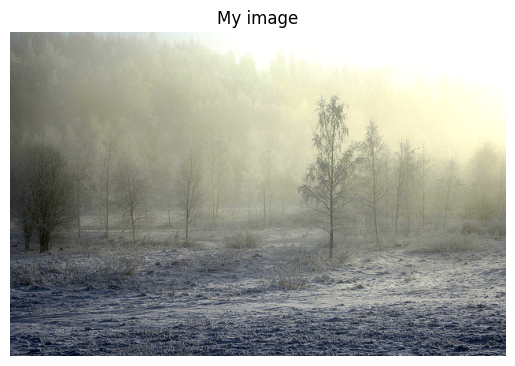

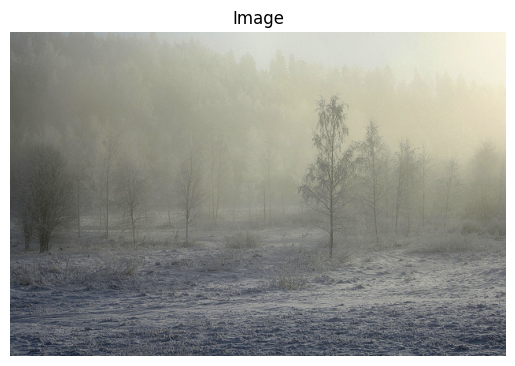

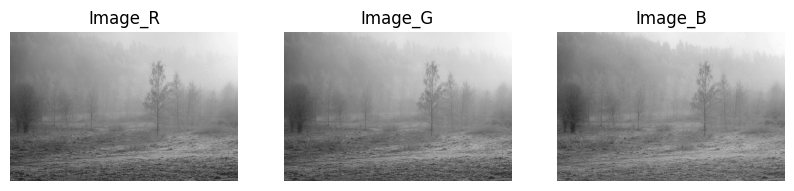

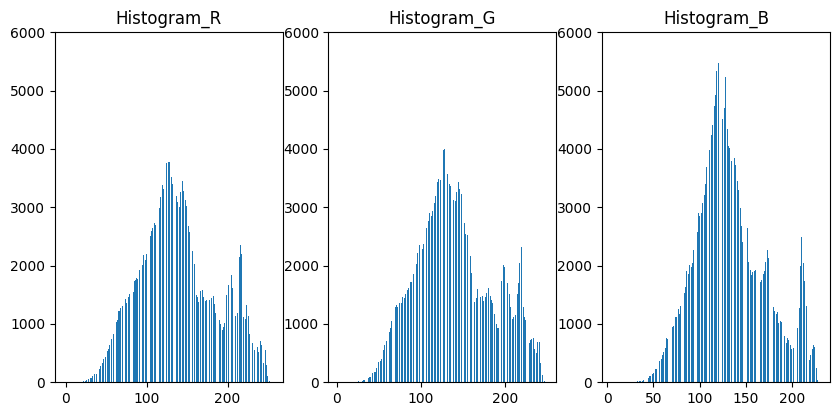

In [5]:
rescaled_intensity = sk.exposure.rescale_intensity(img_9)

print_image(img_9_stretched, "My image")

print_img_hist(rescaled_intensity)

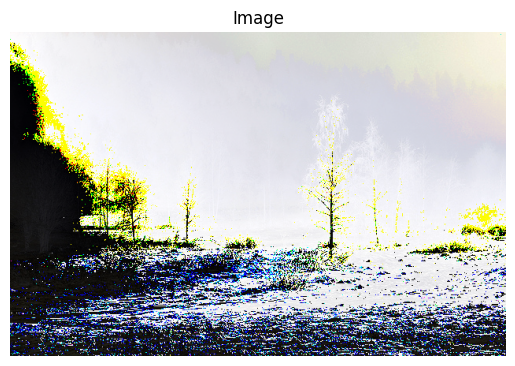

In [6]:

print_image(np.abs(sk.img_as_ubyte(rescaled_intensity) - sk.img_as_ubyte(img_9_stretched)))

We can see that there is differences between the two images: my image looks brighter than the image obtained by the rescale_intesity function. In fact, I choose the values randomly (I just see the histogram and then I find that some values would be cool...), whereas the rescale_intensity choose the values thanks to an heuristic ... In the documentation, we can see that by default, the rescale_intensity function takes the min and the max of the image to stretch the image. So if I try to make the same thing, I obtain the results below:

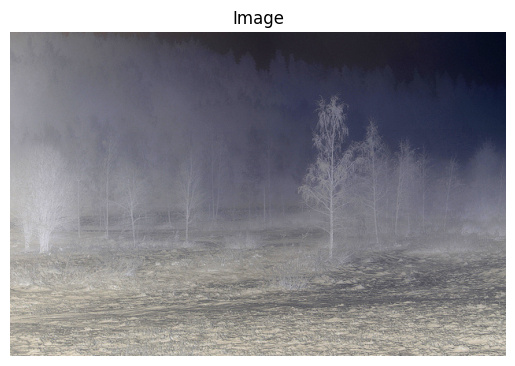

In [7]:
print_image(np.abs(rescaled_intensity - stretching(img_9, np.min(img_9), np.max(img_9))))

The result is satisfiant, but not the hoped result: I would a black image and not this image... So the two method are a little different because they don't produce the same output with the same parameters given... And I find that the image obtained by the rescale_intensity function has a great visual quality because there is more contrast, but not too compared to my image with a white sky.

(d) Perform the sub-exercise (c) with _in_range_ parameter defined by using _np.percentile(.)_ with _q_ parameter equals to (5, 95). Explain the difference between (c) and (d).

> **Hint** : <br/>
start, end = np.percentile(image, (5, 95)) <br/>
adjusted image = rescale intensity(image, in range=(start, end))

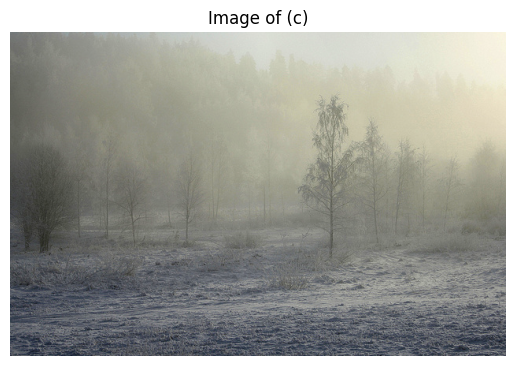

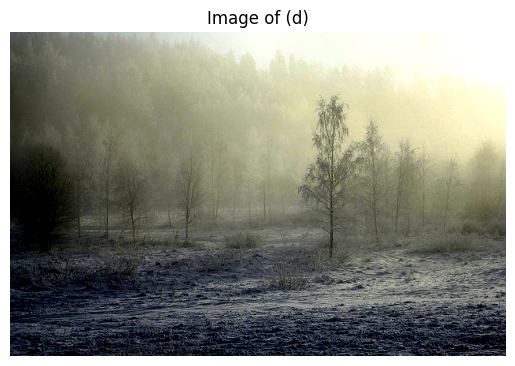

In [8]:
start, end = np.percentile(img_9, (5, 95))
adjusted_image = sk.exposure.rescale_intensity(img_9, in_range=(start, end))
print_image(rescaled_intensity, "Image of (c)")
print_image(adjusted_image, "Image of (d)")

We can see that the image obtained in (d) is more constrasted than the image obtained in (c). And it's logic because in (c), as I read in the documentation, the rescale_intensity function takes the minimum and the maximum of the image to work with, whereas in the (d), we give the maximum value of the 5 % of pixels the most darken, and the minimum value of the 5% of the brightests pixels. So it's different of the minimum and the maximum of the image, that's why we obtain different results. And we have more contrast because we accentuate more the white and the dark, as I try to explain above with the image obtained in (d).

## Exercise 4. Histogram equalization

(a) Perform histogram equalization to the image _img\_11.png_ by using _equalize\_hist(.)_ function from the _skimage_ package.

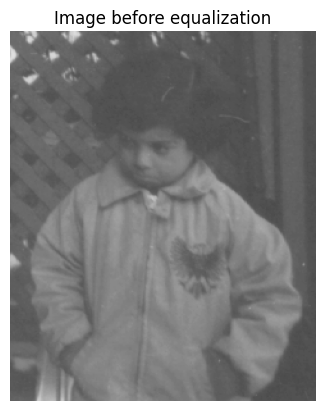

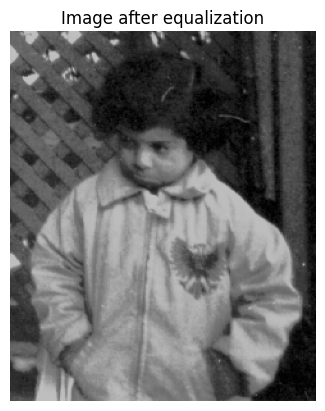

In [9]:
img_11 = plt.imread('./images/img_11.png')

equalization = sk.exposure.equalize_hist(img_11)

print_image(img_11, "Image before equalization")
print_image(equalization, "Image after equalization")

(b) Display the image histogram before and after equalization. Explain what the histogram equalization does.

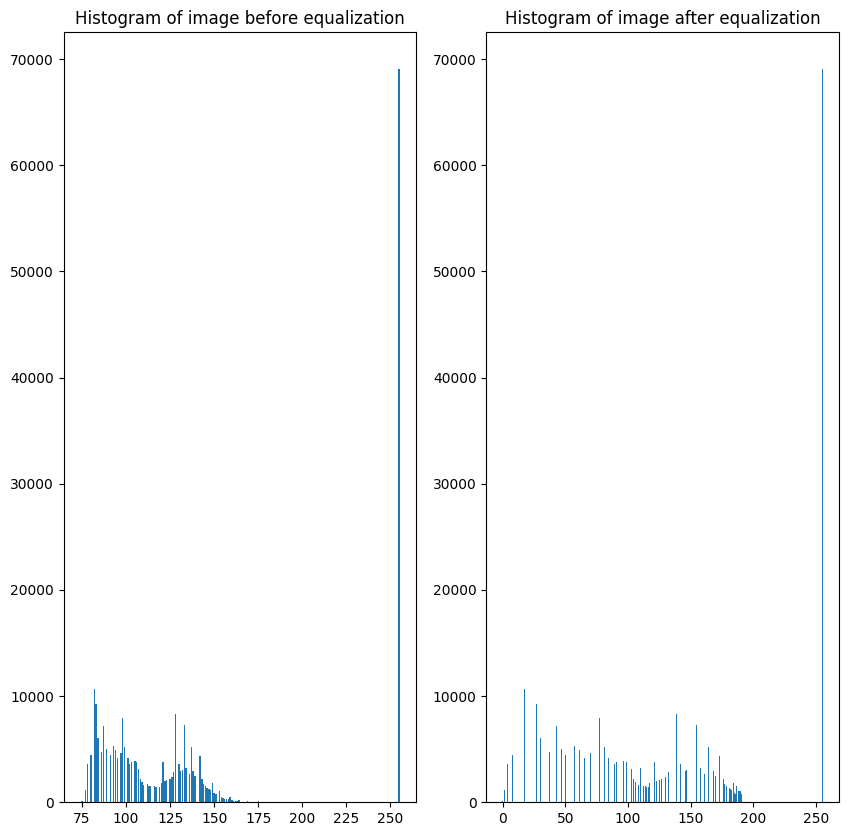

In [10]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.title("Histogram of image before equalization")
hist_1 = sk.exposure.histogram(sk.img_as_ubyte(img_11))
plt.bar(hist_1[1], hist_1[0])
plt.subplot(122)
plt.title("Histogram of image after equalization")
hist_2 = sk.exposure.histogram(sk.img_as_ubyte(equalization))
plt.bar(hist_2[1], hist_2[0])
plt.show()

We can observe that before equalisation, the most of the image pixels are distributed in range 75, 175, and after equalization, they are distributed in range 0, 200... We can observe that the bytes are well distributed, and it don't depend on the minimum or the maximum of the image like the rescale_intensity function because the equalization don't take the pixels of value 255 as maximum to stretch the image pixels.

## Exercise 5. Histogram matching

(a) Apply the function _match_histograms(.)_ from _skimage_ package to _img_4.png_ using _img_2.png_ as a reference.

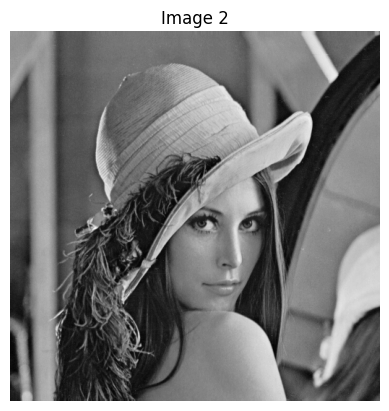

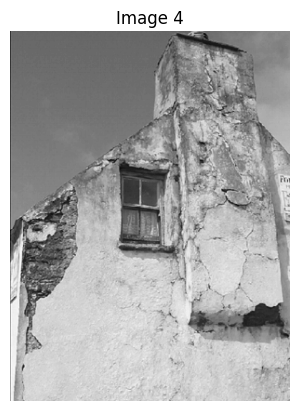

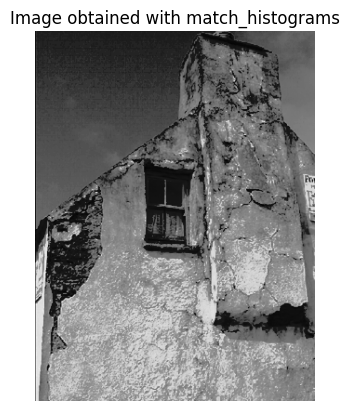

In [11]:
img_2 = plt.imread('./images/img_2.png')
img_4 = plt.imread('./images/img_4.png')

match_hist_img = sk.exposure.match_histograms(img_4, img_2)
print_image(img_2, "Image 2", cmap='gray')
print_image(img_4, "Image 4", cmap='gray')
print_image(match_hist_img, "Image obtained with match_histograms", cmap='gray')

(b) Display the histograms of _img_2.png_, _img_4.png_ before transformation and _img_4.png_ after transformation.

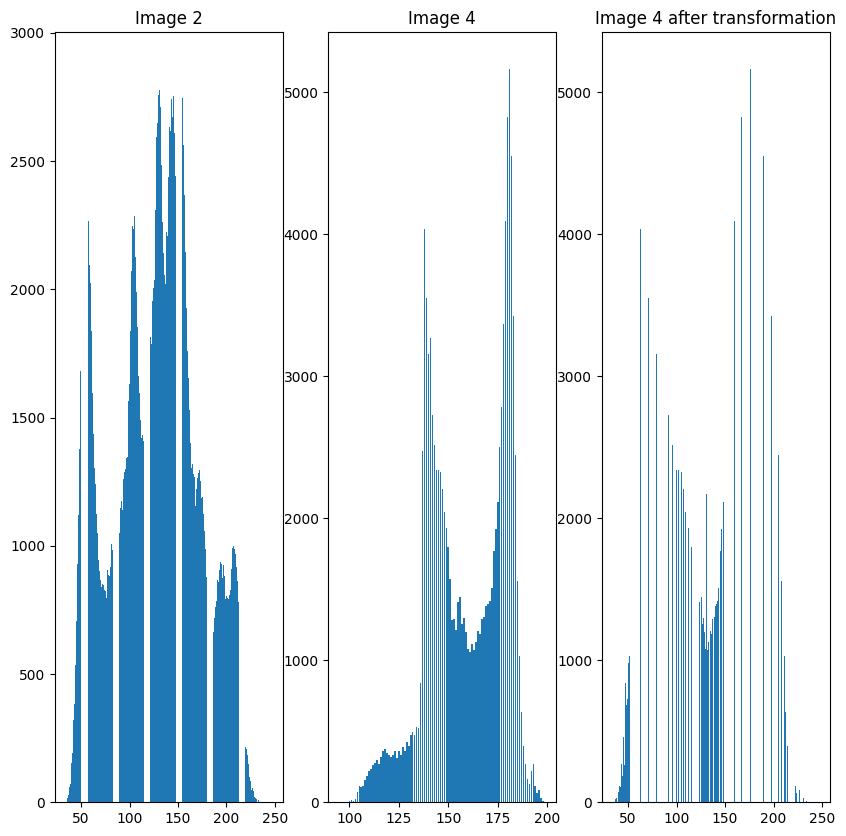

In [12]:
plt.figure(figsize=(10, 10))
plt.subplot(131)
hist_2 = sk.exposure.histogram(sk.img_as_ubyte(img_2))
plt.bar(hist_2[1], hist_2[0])
plt.title("Image 2")
plt.subplot(132)
hist_4 = sk.exposure.histogram(sk.img_as_ubyte(img_4))
plt.bar(hist_4[1], hist_4[0])
plt.title("Image 4")
plt.subplot(133)
plt.title("Image 4 after transformation")
match_hist = sk.exposure.histogram(sk.img_as_ubyte(match_hist_img))
plt.bar(match_hist[1], match_hist[0])
plt.show()

(c) Answer to the following questions:

• What does this function do ? <br/>
• How does this function work ? <br/>
• What can we use it for ?

> Answer here

This function, like it's said in the documentation, allow to take an image and adjust it so that it cumulated histogram is similar to the image of reference.

It can be usefull to apply filter to an image, to increase the visual quality or the contrast of the image thanks to a reference which is more dark or more light than the image...

## Exercise 6. Gamma Correction

(a) Write a function that performs image gamma correction. For more details see Theme 4.

In [13]:
def gamma_correction(image: np.ndarray, gamma: float, alpha: int = 1) -> np.ndarray:
    image = sk.img_as_float32(image)
    return alpha * image ** gamma

(b) Apply your function to img 3.png, for various gamma values. Try to determine the gamma value that best improves the visual image quality.

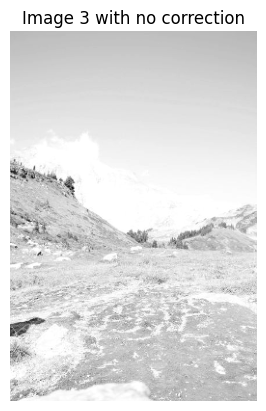

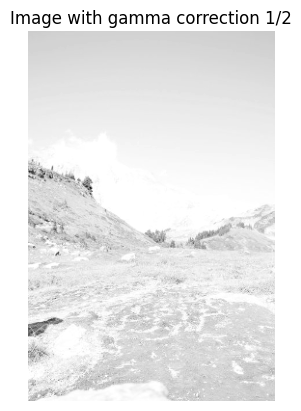

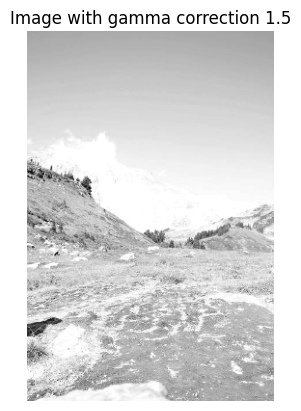

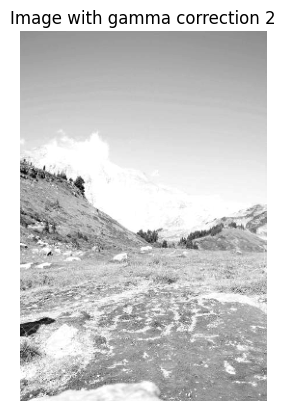

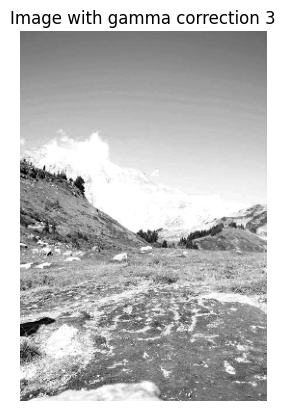

In [14]:
img_3 = plt.imread('./images/img_3.png')
print_image(img_3, "Image 3 with no correction", 'gray')
print_image(gamma_correction(img_3, 0.5), "Image with gamma correction 1/2", 'gray')
print_image(gamma_correction(img_3, 1.5), "Image with gamma correction 1.5", 'gray')
print_image(gamma_correction(img_3, 2), "Image with gamma correction 2", 'gray')
print_image(gamma_correction(img_3, 3), "Image with gamma correction 3", 'gray')

(c) Visualize the image before and after correction. Explain the result.

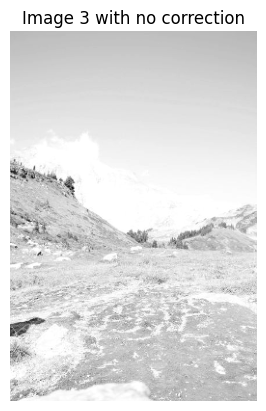

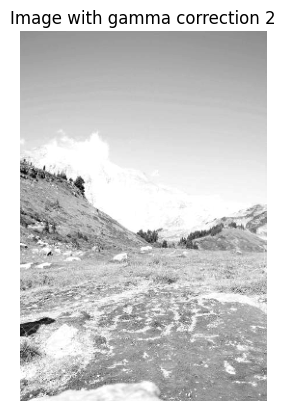

In [15]:
print_image(img_3, "Image 3 with no correction", 'gray')
print_image(gamma_correction(img_3, 2), "Image with gamma correction 2", 'gray')

The gamma correction function take an image (in range 0, 1) and return this image with each component to the power gamma... If we put an element less than one but greater than zero to a power greater than one, the result will be less than the initial value. And all the values of our image are between zero and one. So when we put all the component to a power more than 1, like 2, we obtain a more darken result and it's normal because each component will be less or equal to it initial value. However, the white component will be safe because 1 at any power give us 1.

## Exercise 7. Digital negatives

(a) Write a function that transforms an image into its digital negative.

In [25]:
def digital_negative(image: np.ndarray) -> np.ndarray:
    image = sk.img_as_float32(image)
    newimage = image - 1
    # We takes the elements which are negative and we make them positive
    newimage[newimage < 0] *= -1
    return newimage

(b) Choose 2 images from _img_1.png_ to _img_8.png_ and compute their digital negative. Visualize both the original and negative images.

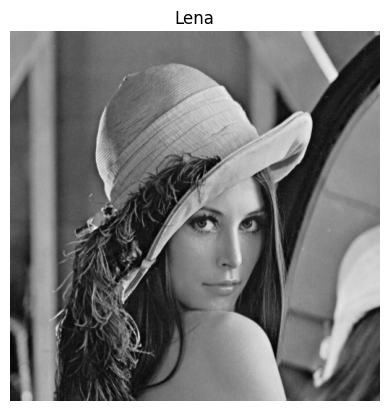

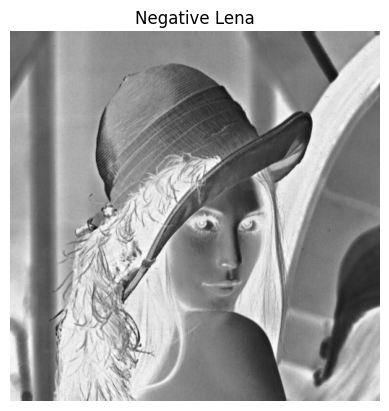

In [26]:
print_image(img_2, "Lena", 'gray')
print_image(digital_negative(img_2), "Negative Lena", 'gray')

(c) Explain in which situation this transformation could be useful.

> Answer here

This transformation could be usefull for instance in steganography or in biology. In fact, we could imagine that a message is hidden in an image, which is very dark... We don't see the message because it's too dark, but when we apply digital negative to the image, we can see the message because the image has become very bright and it's more easy to see unsee details... In biology, we can use this to see for instance the detail of an image of a bacteria, but the image is very dark, so with digital negative, we can see unsee details on the image.

I try to explain how we can hide a message in an image with the example below...

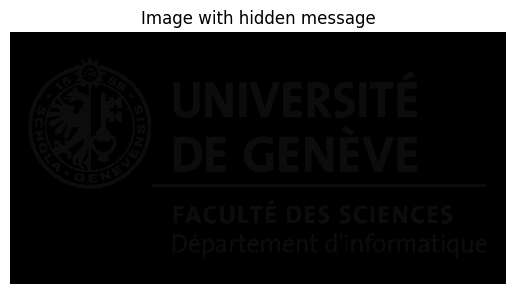

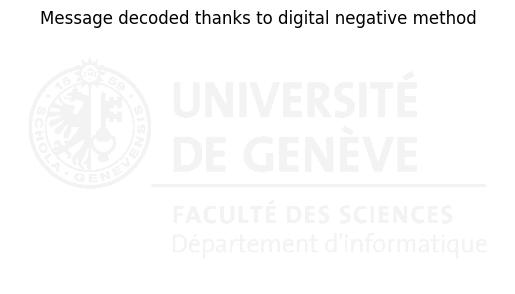

In [45]:
img_unige = plt.imread('./images/unige_csd.png')

img_test = sk.color.rgb2gray(sk.color.rgba2rgb(img_unige))
img_test[img_test <= 0.8] = 0.01
img_test[img_test >= 0.8] = 0.

# We must have more than 2 values in our array, or plt.imshow() will print the image like a binary image... So with just white and black...
img_test[0,:] = 0.2

print_image(img_test, "Image with hidden message", 'gray')
print_image(digital_negative(img_test), "Message decoded thanks to digital negative method", 'gray')

## Exercise 8. Image masking

You are given the image _img_10.png_.

(a) Perform image thresholding to obtain a binary segmentation mask. Display the results for various choices of threshold values.

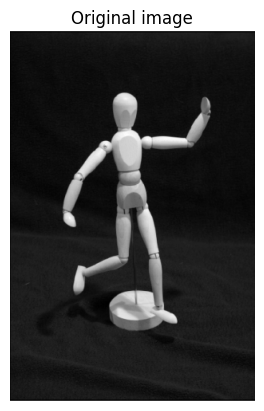

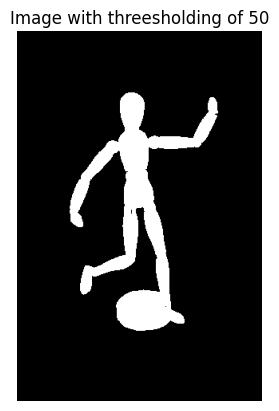

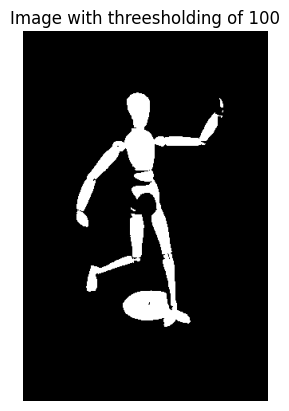

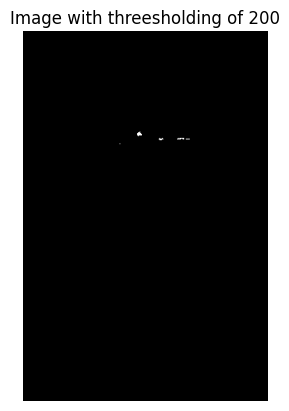

In [54]:
def threesholding(image: np.ndarray, threshold: int) -> np.ndarray:
    newimage = sk.img_as_ubyte(image.copy())
    newimage[newimage < threshold] = 0
    newimage[newimage >= threshold] = 255
    return newimage

img_10 = plt.imread('./images/img_10.png')
print_image(img_10, "Original image", 'gray')
print_image(threesholding(img_10, 50), "Image with threesholding of 50", 'gray')
print_image(threesholding(img_10, 100), "Image with threesholding of 100", 'gray')
print_image(threesholding(img_10, 200), "Image with threesholding of 200", 'gray')

(b) Perform a pixel-wise multiplication between the original image and the various segmentation masks to obtain masked versions of the original image at different threshold. Display the results.

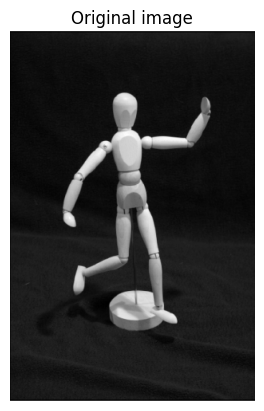

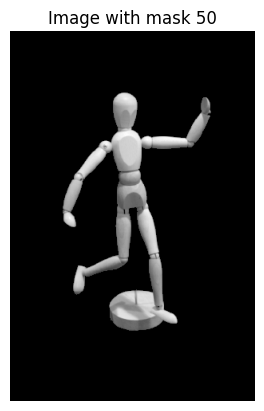

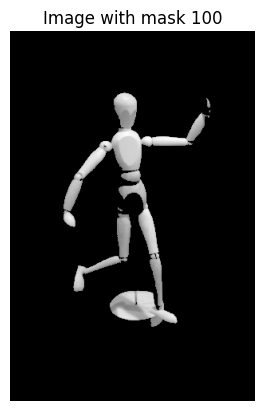

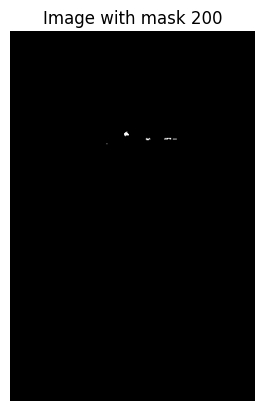

In [55]:
def pixel_wise_multiplication(image: np.ndarray, threshold: int) -> np.ndarray:
    threshoded_image = threesholding(image, threshold)
    return sk.img_as_float32(image) * sk.img_as_float32(threshoded_image)

print_image(img_10, "Original image", 'gray')
print_image(pixel_wise_multiplication(img_10, 50), "Image with mask 50", 'gray')
print_image(pixel_wise_multiplication(img_10, 100), "Image with mask 100", 'gray')
print_image(pixel_wise_multiplication(img_10, 200), "Image with mask 200", 'gray')

(c) Which threshold value works best for the segmentation of the statuette ?

> Answer here

I find that the threshold value which works best for the segmentation of the statuette is given by little values because it allow to have an homogene background and the statuette is conservated. So we can isolate easily the statuette with little value, whereas if we take greater values, like, 200, we can't see the statuette because it is hidden by the mask, so the smaller values are better for the segmentation of this statuette.